# Kaggle Bike Sharing Demand (Bike_Sharing_RA_김혜빈)
[http://www.kaggle.com/c/bike-sharing-demand](http://www.kaggle.com/c/bike-sharing-demand)

- Bike_Sharing_Demand.csv (10,886 * 12)
   - datetime : Date + Timestamp
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
   - workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 획수
   - registered : 사전 등록된 사용자 대여 횟수
   - count : 총 대여 횟수 -> y

# Data Load
   - 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 1. Data Preprocessing

> ## 1) 'String' -> 'Date'

- 'year', 'month', 'day', 'hour' 추출

In [ ]:
df['datetime'] = df.datetime.apply(pd.to_datetime)
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)

> ## 2) Drop Columns

- 'datetime', 'casual', 'registered'

In [ ]:
drop_columns = ['datetime']
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
df.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


# 2. 탐색적데이터분석 및 시각화

- datetime : Date + Timestamp
   - season : 1(봄), 2(여름), 3(가을), 4(겨울)
   - holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
   - workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
   - weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)
   - temp : 온도(섭씨)
   - atemp : 체감온도(섭씨)
   - humidity : 습도
   - windspeed : 풍속
   - casual : 사전 등록되지 않은 사용자 대여 횟수
   - registered : 사전 등록된 사용자 대여 횟수
   - count : 총 대여 횟수 -> y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

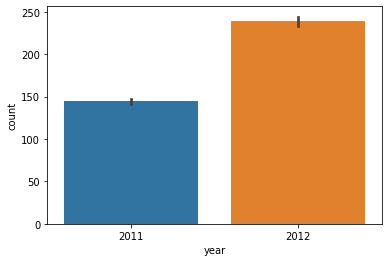

2011년에 비해 2012년의 대여 수가 늘었다.


In [ ]:
sns.barplot(x = 'year', y = 'count', data = df)
plt.show()
print('2011년에 비해 2012년의 대여 수가 늘었다.') 

In [ ]:
df.groupby(['year']).count()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
year,,,,,,,,,,,,,,
2011,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422
2012,5464,5464,5464,5464,5464,5464,5464,5464,5464,5464,5464,5464,5464,5464


In [ ]:
sns.pairplot(df)
plt.show()
# month x temp, atemp
# temp x atemp
# casual x hour
# register x hour
# count x hour

Output hidden; open in https://colab.research.google.com to view.

- month

In [ ]:
df.groupby(['month']).count()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
month,,,,,,,,,,,,,,
1,884,884,884,884,884,884,884,884,884,884,884,884,884,884
2,901,901,901,901,901,901,901,901,901,901,901,901,901,901
3,901,901,901,901,901,901,901,901,901,901,901,901,901,901
4,909,909,909,909,909,909,909,909,909,909,909,909,909,909
5,912,912,912,912,912,912,912,912,912,912,912,912,912,912
6,912,912,912,912,912,912,912,912,912,912,912,912,912,912
7,912,912,912,912,912,912,912,912,912,912,912,912,912,912
8,912,912,912,912,912,912,912,912,912,912,912,912,912,912
9,909,909,909,909,909,909,909,909,909,909,909,909,909,909


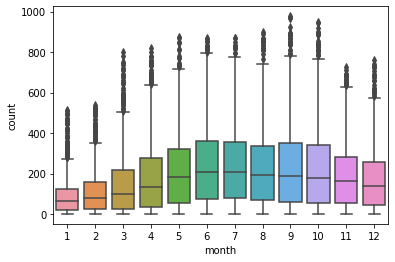

In [ ]:
sns.boxplot(x = 'month', y = 'count', data = df)

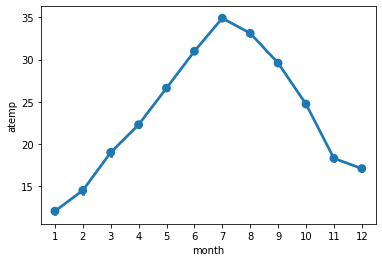

In [ ]:
sns.pointplot(x = 'month', y = 'atemp', data = df)

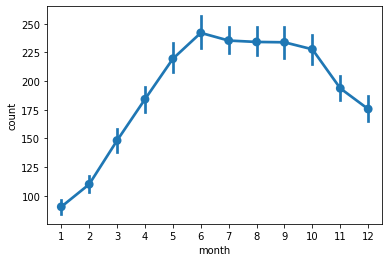

In [ ]:
sns.pointplot(x = 'month', y = 'count', data = df)
# 6월의 수요가 가장 많고, 1월이 가장 적다.

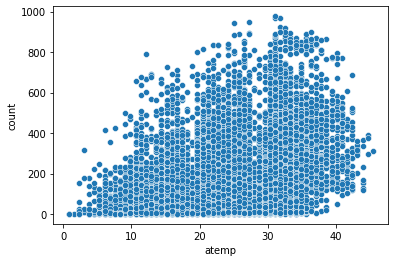

In [ ]:
sns.scatterplot(x = 'atemp', y = 'count', data = df)
# 우상향으로 경향이 있다.

- season

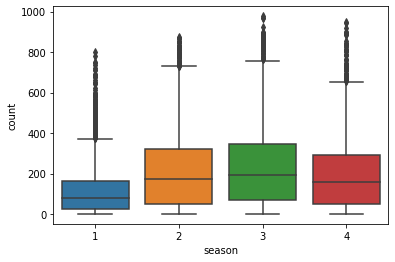

In [ ]:
sns.boxplot(x = 'season', y = 'count', data = df)

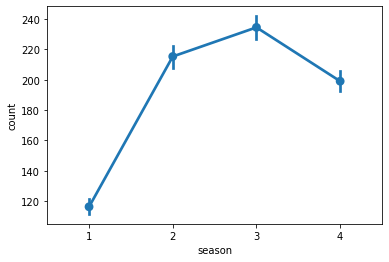

In [ ]:
sns.pointplot(x = 'season', y = 'count', data = df)
# 여름, 가을 수요 높고, 봄은 낮다.

- weather

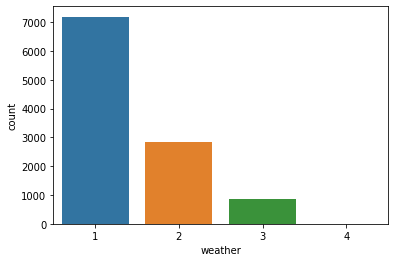

In [ ]:
# 날씨별 도수
sns.countplot(x = 'weather', data = df)
# 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/ 번개)

In [166]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
# 심한 눈, 비, 천둥, 번개 날씨는 2년 동안 한 시간대에만 집계됐다.
# df.weather.value_counts()
df.loc[(df['weather'] == 4)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18


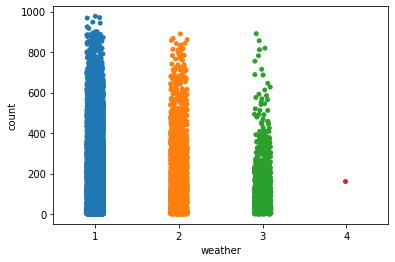

In [ ]:
sns.stripplot(x = 'weather', y = 'count', data = df)

In [ ]:
a = df.groupby(by = 'weather').sum()
a['count']
# 날씨가 좋을 수록 총 대여 수가 많다.

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

- hour

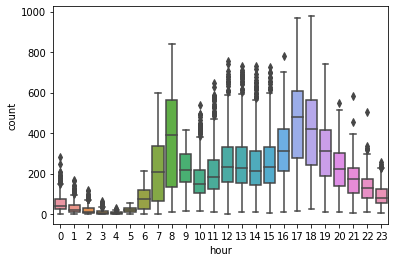

In [ ]:
sns.boxplot(x = 'hour', y = 'count', data = df)

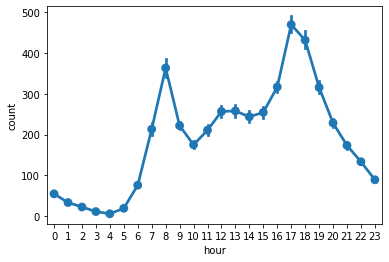

In [ ]:
sns.pointplot(x = 'hour', y = 'count', data = df)
# 출근시간대와 퇴근시간대에 수요가 높다.

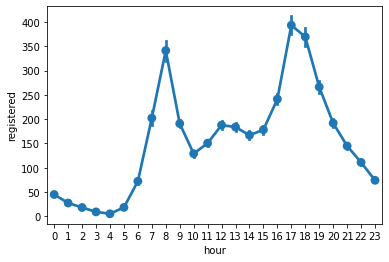

In [ ]:
sns.pointplot(x = 'hour', y = 'registered', data = df)
# 예약을 하고 대여하는 횟수가 시간대별 빈도 그래프와 거진 일치한다.
# 출근, 퇴근 시간대의 이용자들은 정기적으로 대여하는 고객인 것 같다.

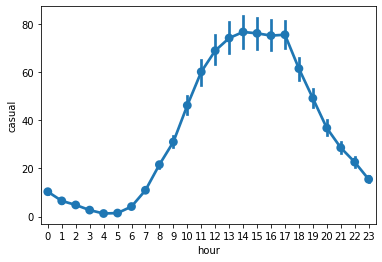

In [ ]:
sns.pointplot(x = 'hour', y = 'casual', data = df)
# 반면, 예약을 하지 않고 대여할 땐 출근, 퇴근 시간대보다는 낮시간 전반적으로 많이 이용한다.

- workingday

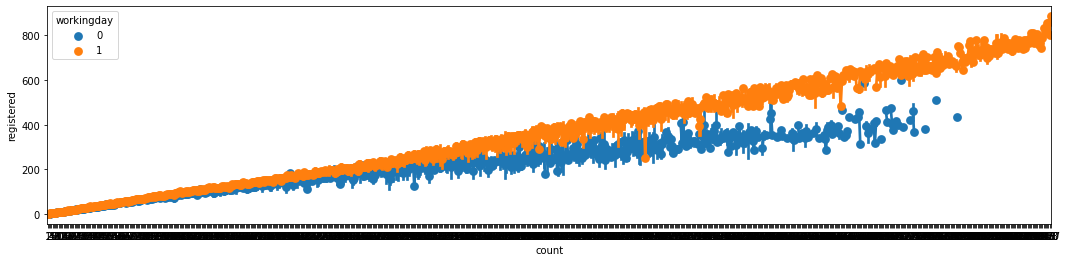

In [ ]:
plt.figure(figsize = (18, 4))
sns.pointplot(x = 'count', y = 'registered', hue = 'workingday', data = df)
# 주중에 예약한 대여 수가 많고, 주말은 그에 비해 적음
# hour의 결과에 더해서 예약 대여한 자전거는 출퇴근 목적임을 예상하게 된다.

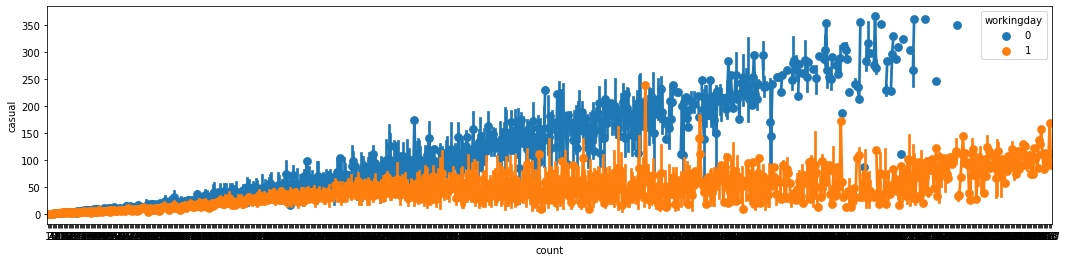

In [ ]:
plt.figure(figsize = (18, 4))
sns.pointplot(x = 'count', y = 'casual', hue = 'workingday', data = df)
# 반대로, 주말엔 예약하지 않은 자전거 대여 수가 많고, 주중은 적다.
# 위 가설에 힘을 싣는다.

# 3. 데이터 설정

> ## 1) 분석 변수 선택

- X : 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered' 
- y : 'count'

In [ ]:
df1 = df[[ 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered', 'count']]
df1.head()

,month,day,hour,season,holiday,workingday,weather,atemp,casual,registered,count
0,1,1,0,1,0,0,1,14.395,3,13,16
1,1,1,1,1,0,0,1,13.635,8,32,40
2,1,1,2,1,0,0,1,13.635,5,27,32
3,1,1,3,1,0,0,1,14.395,3,10,13
4,1,1,4,1,0,0,1,14.395,0,1,1


> ## 2) Train & Test Split

- 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered']]
y = df1['count']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7620, 10) (7620,)
Test Data :  (3266, 10) (3266,)


# 모델 비교 - MultivariateRegression, Ridge, XGBoost, RandomForest, AdaptiveBoosting 

# 4. Multivariate Regression

> ## 1) 모델 생성


In [ ]:
%%time
from sklearn.linear_model import LinearRegression
MR = LinearRegression(normalize = True,
                      n_jobs = -1)
MR.fit(X_train, y_train)

CPU times: user 32.5 ms, sys: 7.08 ms, total: 39.6 ms
Wall time: 127 ms


> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error
MR_mse = np.sqrt(mean_squared_error(y_test, MR.predict(X_test)))
MR_mse

2.2104379530049725e-13

# 5. Ridge Regression


In [ ]:
%%time
from sklearn.linear_model import Ridge
RG = Ridge(normalize = True, 
           alpha = 0.3,     
           solver = 'cholesky')

RG.fit(X_train, y_train)
# sqrt(mse) : 36.29

CPU times: user 6.37 ms, sys: 9 µs, total: 6.38 ms
Wall time: 6.32 ms


In [ ]:
%%time
from sklearn.linear_model import Ridge
RG = Ridge(normalize = True, 
           alpha = 0.0001,     
           solver = 'cholesky')

RG.fit(X_train, y_train)
# sqrt(mse) : 0.017712288734350257
# alpha = 0.0001 값을 쓰기로 결정

CPU times: user 4.43 ms, sys: 961 µs, total: 5.4 ms
Wall time: 5.53 ms


> ## 2) 모델 평가

In [ ]:
RG_mse = np.sqrt(mean_squared_error(y_test, RG.predict(X_test)))
RG_mse

0.017712288734350257

# 6. eXtra Gradient Boost(XGBoost) Regressor 


> ## 1) 모델 생성

In [ ]:
%%time
from xgboost import XGBRegressor
XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.9,
                   reg_lambda = 2.0,
                   n_jobs = -1)
XGB.fit(X_train, y_train)

[07:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 344 ms, sys: 2.94 ms, total: 347 ms
Wall time: 196 ms


> ## 2) 모델 평가

In [ ]:
XGB_mse = np.sqrt(mean_squared_error(y_test, XGB.predict(X_test)))
XGB_mse

0.04569039298845672

# 7. Random Forest Regressor

> ## 1) 모델 생성

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 10,
                            max_depth = 5,
                            criterion = 'mse',
                            n_jobs = -1,
                            random_state = 2045)
RFR.fit(X_train, y_train)

CPU times: user 27.2 s, sys: 251 ms, total: 27.4 s
Wall time: 14.7 s


> ## 2) 모델 평가

In [ ]:
RFR_mse = np.sqrt(mean_squared_error(y_test, RFR.predict(X_test)))
RFR_mse

16.149485602079142

## 3) Feature Importance

In [ ]:
RFR.feature_importances_

array([4.94984528e-08, 4.90889324e-08, 2.80931436e-06, 1.08591625e-07,
       0.00000000e+00, 3.54543316e-06, 4.77511543e-08, 6.59270471e-07,
       4.17690097e-02, 9.58223721e-01])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


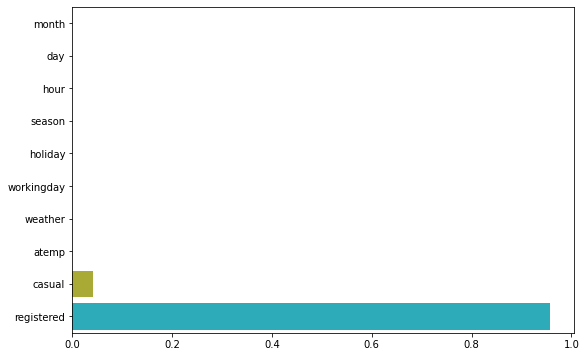

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(RFR.feature_importances_,
            ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered'])
plt.show()

# 8. Adaptive Boosting Regressor

> ## 1) 모델 생성

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.7,
                        random_state = 2045)
ABR.fit(X_train, y_train)

CPU times: user 4.59 s, sys: 21.6 ms, total: 4.61 s
Wall time: 4.62 s


> ## 2) 모델 평가

In [ ]:
ABR_mse = np.sqrt(mean_squared_error(y_test, ABR.predict(X_test)))
ABR_mse

29.992165005122594

> ## 3) Feature Importance

In [ ]:
ABR.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 2.43413314e-03, 0.00000000e+00,
       0.00000000e+00, 1.88064461e-04, 0.00000000e+00, 8.31194645e-04,
       2.55585779e-01, 7.40960829e-01])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


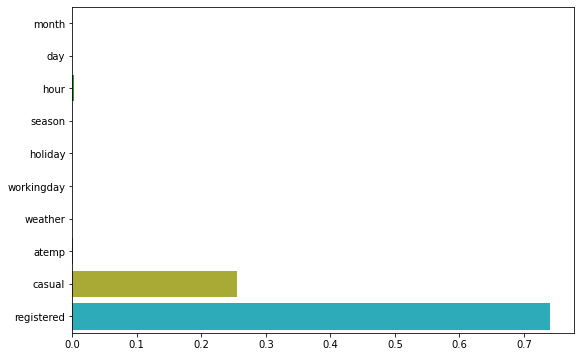

In [ ]:
plt.figure(figsize = (9, 6))
sns.barplot(ABR.feature_importances_,
            ['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual', 'registered'])
plt.show()
# 랜덤 포레스트에서의 변수 기여도와 비교했을 때, casual 변수의 기여도가 높다.

# 9. 결론

In [ ]:
df_result = pd.DataFrame({"Model" : ['MR', 'RG', 'XGB', 'RFR', 'ABR'],
                          "MSE" : [MR_mse, RG_mse, XGB_mse, RFR_mse, ABR_mse]})
                          
df_result.sort_values(by=['MSE'], axis=0, ascending=True)

# 성능이 가장 좋은 모델은 MultivariateRegression이고
# 가장 성능이 좋지 않은 모델은 AdaptiveBoostingRegressor이다.

,Model,MSE
0,MR,2.210438e-13
1,RG,1.771229e-02
2,XGB,4.569039e-02
3,RFR,1.614949e+01
4,ABR,2.999217e+01
